Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
def run_configuration(config):
    mlp = MLPClassifier(**config)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    test_item = {"config":config, "accuracy":accuracy_score(y_test, y_pred)}
    return test_item

In [ ]:
import random
import math
import warnings
from sklearn.exceptions import ConvergenceWarning
global population

config_ranges = {
    "hidden_layer_sizes": [(100,), (50), (10, 10), (150)],
    "max_iter": [7],
    "alpha": [1e-3, 1e-4, 1e-5],
    "solver": ["adam", "sgd"],
    "learning_rate_init": [0.05, 0.1, 0.15],
    "activation": ['relu', 'logistic', 'tanh'],
    "early_stopping": [True, False],
    "random_state": [1, 2]
}
numerical_keys = {"alpha", "learning_rate_init"}
all_keys = list(config_ranges.keys())
mutable_keys = [key for key in all_keys if len(config_ranges[key]) > 1]

mutant_rate = 1/20
max_population = 16
generations = 8
births_per_generation = 8
tournament_size = 5
population = []

def sort_population():
    global population
    population = sorted(population, key=lambda item: -item["accuracy"])

def add_to_population(config):
    result = run_configuration(config)
    if result not in population:
       population.insert(1, result)

def random_tournament(ignore={}):
    volunteers = [body for body in population if body != ignore]
    return max(random.sample(volunteers, min(len(volunteers), tournament_size)), key=lambda body: body["accuracy"])

def reproduce(left_body, right_body):
    new_config = left_body["config"].copy()
    for each_key in random.sample(all_keys, random.randint(0, len(all_keys))):
        new_config[each_key] = right_body["config"][each_key]
    for each_key in mutable_keys:
        if random.uniform(0, 1) < mutant_rate:
            if each_key in numerical_keys:
                new_config[each_key] *= random.uniform(0.7, 1.3)
            else:
                new_config[each_key] = random.choice([each for each in config_ranges[each_key] if each != new_config[each_key]])

    return new_config

def cull_population():
    sort_population()
    global population
    population = population[:max_population]

def init_population():
    for _ in range(0, max_population):
        new_config = {}
        for each_key in config_ranges:
            new_config[each_key] = random.choice(config_ranges[each_key])
        add_to_population(new_config)

def display_fitness(generation):
    scores = list(map(lambda body: body["accuracy"], population))
    print("generation", generation, "best", max(scores), "avg", sum(scores) / len(scores))

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

init_population()
display_fitness(0)
for generation in range(1, generations + 1):
    for _ in range(0, births_per_generation):
        left_body = random_tournament()
        right_body = random_tournament(left_body)
        add_to_population(reproduce(left_body, right_body))
    cull_population()
    display_fitness(generation)

generation 0 best 0.8816 avg 0.8157214285714286
generation 1 best 0.8824 avg 0.8493625
generation 2 best 0.8824 avg 0.85666875
generation 3 best 0.8824 avg 0.86456875
generation 4 best 0.8824 avg 0.8712562500000001
generation 5 best 0.8824 avg 0.87335
generation 6 best 0.8837 avg 0.87795
generation 7 best 0.8856 avg 0.8788875
generation 8 best 0.8856 avg 0.8788875


In [ ]:

for each_body in population: print(each_body)



{'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.15177829962856074, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8856}
{'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.15, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8837}
{'config': {'hidden_layer_sizes': 150, 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.15, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8824}
{'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.00010938909086935239, 'solver': 'sgd', 'learning_rate_init': 0.1, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8817}
{'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.1, 'activation': '

In [7]:
sampling = {
    ["Best"] = {'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.15177829962856074, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8856},
    ["Tanh"] = {'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.1, 'activation': 'tanh', 'early_stopping': False, 'random_state': 1}, 'accuracy': 0.8743},
    ["Early Stop, Low Alpha, 0.1 Learning Rate"] = {'config': {'hidden_layer_sizes': (100,), 'max_iter': 7, 'alpha': 0.00010938909086935239, 'solver': 'sgd', 'learning_rate_init': 0.1, 'activation': 'logistic', 'early_stopping': True, 'random_state': 2}, 'accuracy': 0.8757},
    ["150 Nodes"] = {'config': {'hidden_layer_sizes': 150, 'max_iter': 7, 'alpha': 0.0001, 'solver': 'sgd', 'learning_rate_init': 0.15, 'activation': 'logistic', 'early_stopping': False, 'random_state': 2}, 'accuracy': 0.8824},
}



Running simulation for: Best


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


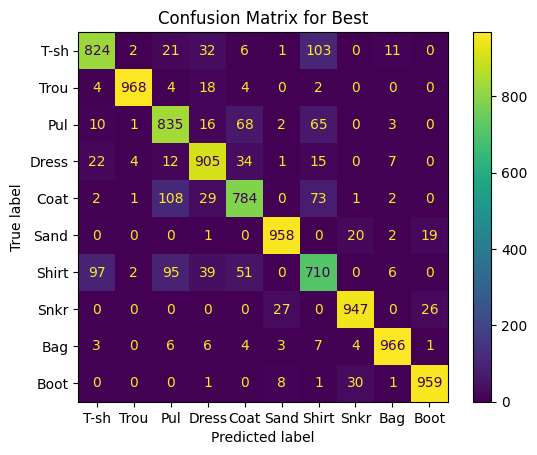

Running simulation for: Tanh


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


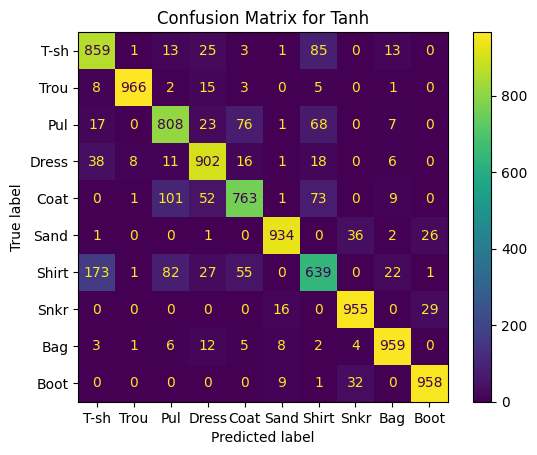

Running simulation for: Early Stop, Low Alpha, 0.1 Learning Rate


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


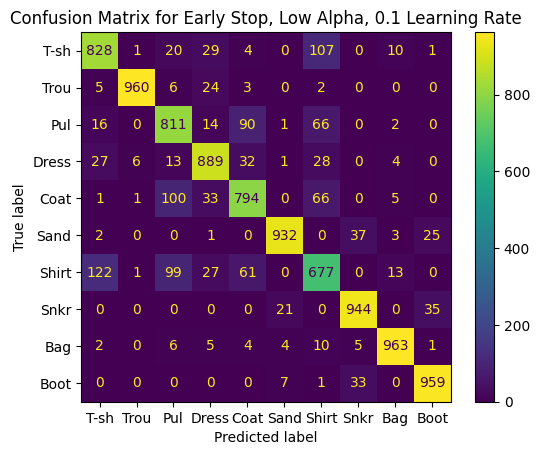

Running simulation for: 150 Nodes


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


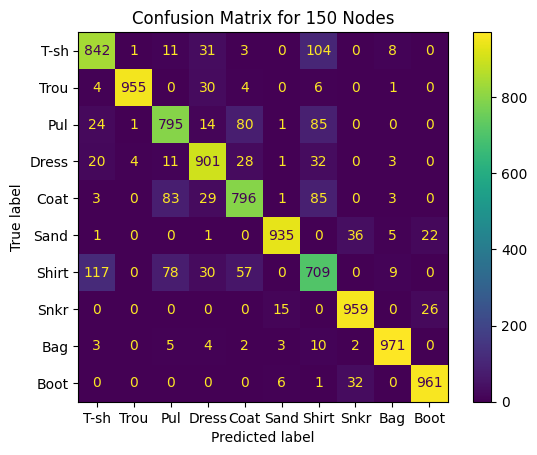


Training Times:
Best: 13.0797 seconds
Tanh: 11.8346 seconds
Early Stop, Low Alpha, 0.1 Learning Rate: 8.4125 seconds
150 Nodes: 13.3094 seconds


In [12]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

results = {}
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
abbreviated_labels = ['T-sh', 'Trou', 'Pul', 'Dress', 'Coat', 'Sand', 'Shirt', 'Snkr', 'Bag', 'Boot']

for name, item in sampling.items():
    print(f"Running simulation for: {name}")
    start_time = time.time()
    mlp = MLPClassifier(**item["config"])
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    end_time = time.time()
    training_time = end_time - start_time

    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix as a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abbreviated_labels)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    results[name] = {
        "accuracy": item["accuracy"], # Use the accuracy already calculated
        "training_time": training_time
    }

# Print training times
print("\nTraining Times:")
for name, result in results.items():
    print(f"{name}: {result['training_time']:.4f} seconds")

# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

# 2. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

NameError: name 'nn' is not defined

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

In [ ]:
# 1. Define a Convolutional Neural Network (CNN) model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 7 * 7, 10) # 7x7 comes from the image size after pooling

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1) # Flatten the output for the fully connected layer
        x = self.fc(x)
        return x

model = SimpleCNN().to(device)

In [ ]:
# 6. Evaluate the trained model on the test set
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for evaluation
    correct = 0
    total = 0
    for images, labels in test_loader: # Evaluate on the test set
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [ ]:
# 4. Implement the evaluation loop
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for evaluation
    correct = 0
    total = 0
    for images, labels in val_loader: # Evaluate on the validation set
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')

In [ ]:
# 3. Implement the training loop
num_epochs = 10 # You can adjust this number

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')